In [25]:
import pandas as pd
import glob
import os
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns 
 

In [2]:
# Define both experiment paths
paths = [
    "/Volumes/TwoTeras/1_Experiment_2/Eye_Tracking/Pre_processed/05_Debbies_gaze",
    "/Volumes/TwoTeras/0_Experiment_1/Eye_Tracking/Pre_processed/05_Debbies_gaze"
]

# Initialize content list
content = []

# Loop through both paths
for path in paths:
    # Get matching CSVs that end with '_1.csv'
    files = [f for f in glob.glob(os.path.join(path, "*.csv")) if os.path.basename(f).split(".")[0].endswith("_1")]
    
    for filename in files:
        df = pd.read_csv(filename)
        df = df.loc[:, ~df.columns.str.contains('^Unnamed', case=False)]
        print(f"Loaded: {os.path.basename(filename)}")  # Optional log
        content.append(df)

# Combine all data
data_frame = pd.concat(content, ignore_index=True)


Loaded: 1031_1.csv
Loaded: 1268_1.csv
Loaded: 1574_1.csv
Loaded: 1843_1.csv
Loaded: 2069_1.csv
Loaded: 3193_1.csv
Loaded: 3540_1.csv
Loaded: 4580_1.csv
Loaded: 4598_1.csv
Loaded: 4847_1.csv
Loaded: 4875_1.csv
Loaded: 5161_1.csv
Loaded: 5189_1.csv
Loaded: 5743_1.csv
Loaded: 5766_1.csv
Loaded: 5851_1.csv
Loaded: 5972_1.csv
Loaded: 6406_1.csv
Loaded: 7081_1.csv
Loaded: 7393_1.csv
Loaded: 7823_1.csv
Loaded: 7935_1.csv
Loaded: 8629_1.csv
Loaded: 9297_1.csv
Loaded: 9627_1.csv
Loaded: 1142_1.csv
Loaded: 1234_1.csv
Loaded: 6266_1.csv
Loaded: 5191_1.csv
Loaded: 6254_1.csv
Loaded: 9535_1.csv
Loaded: 0365_1.csv
Loaded: 1754_1.csv
Loaded: 2258_1.csv
Loaded: 2693_1.csv
Loaded: 3246_1.csv
Loaded: 3310_1.csv
Loaded: 3572_1.csv
Loaded: 3976_1.csv
Loaded: 4176_1.csv
Loaded: 4796_1.csv
Loaded: 4917_1.csv
Loaded: 5238_1.csv
Loaded: 5531_1.csv
Loaded: 5741_1.csv
Loaded: 6642_1.csv
Loaded: 7093_1.csv
Loaded: 7264_1.csv
Loaded: 7412_1.csv
Loaded: 7842_1.csv
Loaded: 8007_1.csv
Loaded: 8469_1.csv
Loaded: 8673

In [3]:
# Drop columns named exactly 'Unnamed: 0', 'level_0', or 'index'
columns_to_drop = ['level_0', 'index']
data_frame = data_frame.drop(columns=[col for col in columns_to_drop if col in data_frame.columns])

# Drop any columns whose names contain 'unnamed' (case-insensitive)
data_frame = data_frame.loc[:, ~data_frame.columns.str.contains('unnamed', case=False)]


In [4]:
print(data_frame.columns.tolist())

['SubjectID', 'Session', 'SessionSubsection', 'timeStampDataPointEnd', 'eyeOpennessLeft', 'eyeOpennessRight', 'pupilDiameterMillimetersLeft', 'pupilDiameterMillimetersRight', 'leftGazeValidityBitmask', 'rightGazeValidityBitmask', 'combinedGazeValidityBitmask', 'rayCastHitsLeftEye', 'rayCastHitsRightEye', 'eyePositionCombinedWorld.x', 'eyePositionCombinedWorld.y', 'eyePositionCombinedWorld.z', 'eyeDirectionCombinedWorld.x', 'eyeDirectionCombinedWorld.y', 'eyeDirectionCombinedWorld.z', 'eyeDirectionCombinedLocal.x', 'eyeDirectionCombinedLocal.y', 'eyeDirectionCombinedLocal.z', 'eyePositionLeftWorld.x', 'eyePositionLeftWorld.y', 'eyePositionLeftWorld.z', 'eyeDirectionLeftWorld.x', 'eyeDirectionLeftWorld.y', 'eyeDirectionLeftWorld.z', 'eyeDirectionLeftLocal.x', 'eyeDirectionLeftLocal.y', 'eyeDirectionLeftLocal.z', 'eyePositionRightWorld.x', 'eyePositionRightWorld.y', 'eyePositionRightWorld.z', 'eyeDirectionRightWorld.x', 'eyeDirectionRightWorld.y', 'eyeDirectionRightWorld.z', 'eyeDirection

In [5]:
# --- Define summary function for selected features ---
def compute_summary_features(df, features):
    def feature_stats(x):
        x = x.dropna()
        if len(x) == 0:
            return pd.Series({
                'mean': np.nan,
                'median': np.nan,
                'std': np.nan,
                'iqr': np.nan,
                'max': np.nan,
                'bowley_skewness': np.nan
            })
        q1 = np.nanpercentile(x, 25)
        q2 = np.nanpercentile(x, 50)
        q3 = np.nanpercentile(x, 75)
        iqr = q3 - q1
        bowley = (q3 + q1 - 2 * q2) / iqr if iqr != 0 else np.nan
        return pd.Series({
            'mean': np.nanmean(x),
            'median': q2,
            'std': np.nanstd(x),
            'iqr': iqr,
            'max': np.nanmax(x),
            'bowley_skewness': bowley
        })

    return df.groupby('SubjectID')[features].apply(lambda g: g.apply(feature_stats)).unstack()




In [6]:
# --- Specify features ---
selected_features = ['length', 'corrected_vel']

In [7]:
# --- Fixations ---
fixation_df = data_frame[data_frame['events'] == -2].copy()
fixation_stats = compute_summary_features(fixation_df, selected_features)
fixation_stats.columns = ['Fix_' + '_'.join(col) for col in fixation_stats.columns]
fixation_stats.reset_index(inplace=True)


In [8]:
# --- Saccades ---
saccade_df = data_frame[data_frame['events'] == -1].copy()
saccade_stats = compute_summary_features(saccade_df, selected_features)
saccade_stats.columns = ['Sac_' + '_'.join(col) for col in saccade_stats.columns]
saccade_stats.reset_index(inplace=True)


In [9]:
# --- Merge per subject ---
summary_per_subject = pd.merge(fixation_stats, saccade_stats, on='SubjectID', how='outer')

In [10]:
summary_per_subject.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SubjectID                          60 non-null     int64  
 1   Fix_length_mean                    60 non-null     float64
 2   Fix_length_median                  60 non-null     float64
 3   Fix_length_std                     60 non-null     float64
 4   Fix_length_iqr                     60 non-null     float64
 5   Fix_length_max                     60 non-null     float64
 6   Fix_length_bowley_skewness         60 non-null     float64
 7   Fix_corrected_vel_mean             60 non-null     float64
 8   Fix_corrected_vel_median           60 non-null     float64
 9   Fix_corrected_vel_std              60 non-null     float64
 10  Fix_corrected_vel_iqr              60 non-null     float64
 11  Fix_corrected_vel_max              60 non-null     float64
 

In [11]:
# Group by SubjectID and events, then count
event_counts = (
    data_frame[data_frame['events'].isin([-2])]
    .groupby(['SubjectID', 'events'])
    .size()
    .unstack(fill_value=0)
    .rename(columns={ -2: 'n_fixations'})
    .reset_index()
)


In [12]:
event_counts.head()

events  SubjectID  n_fixations
0             365         5907
1             479         6575
2            1031         5987
3            1142         5944
4            1234         5167

In [13]:
# Merge into summary
summary_per_subject = pd.merge(summary_per_subject, event_counts, on='SubjectID', how='left')
summary_per_subject.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SubjectID                          60 non-null     int64  
 1   Fix_length_mean                    60 non-null     float64
 2   Fix_length_median                  60 non-null     float64
 3   Fix_length_std                     60 non-null     float64
 4   Fix_length_iqr                     60 non-null     float64
 5   Fix_length_max                     60 non-null     float64
 6   Fix_length_bowley_skewness         60 non-null     float64
 7   Fix_corrected_vel_mean             60 non-null     float64
 8   Fix_corrected_vel_median           60 non-null     float64
 9   Fix_corrected_vel_std              60 non-null     float64
 10  Fix_corrected_vel_iqr              60 non-null     float64
 11  Fix_corrected_vel_max              60 non-null     float64
 

In [14]:
Proxemics_Session_min = pd.read_csv("/Volumes/TwoTeras/3_Merged_Experiments/Proxemics_Session_Min.csv")

Proxemics_Session_min.head()

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0  ped_id  minimal_distance  \
0          1876             5           5  11_cma          4.561236   
1          1878             6           6  043_sa          4.030516   
2          1872             3           3  045_sa          9.892645   
3          1866             0           0  046_sa          5.392003   
4          1874             4           4  051_sa          5.582938   

   num_interactions  SubjectID  Session Agent_Type  Experiment  \
0                 1        365        1     Active           1   
1                 1        365        1    Passive           1   
2                 1        365        1    Passive           1   
3                 1        365        1    Passive           1   
4                 1        365        1    Passive           1   

   PointingTargetBuildingId  Agent_ID     BuildingName  Context  \
0                        27        11  TaskBuilding_27     True   
1                        30        43  TaskBuilding_30    False   
2                        33        45  TaskBuilding_33    False   
3                        35        46  TaskBuilding_35    False   
4                        43        51  TaskBuilding_43    False   

                Label  
0     (P) Donut shop   
1      (R) Purple Bat  
2      (R) Death sign  
3  (R)  Undertheocean  
4           (R) Daisy

In [15]:
# Drop any column containing 'unnamed' (case-insensitive)
Proxemics_Session_min = Proxemics_Session_min.loc[:, ~Proxemics_Session_min.columns.str.contains('unnamed', case=False)]

# Keep only Session 1 and Experiment 2
Proxemics_Session1_min = Proxemics_Session_min[(Proxemics_Session_min['Session'] == 1)].copy()
selected_features = ["minimal_distance"] 
Proxemics_stats = compute_summary_features(Proxemics_Session1_min, selected_features)
Proxemics_stats.columns = ['Prox_' + '_'.join(col) for col in Proxemics_stats.columns]
Proxemics_stats.reset_index(inplace=True)

In [16]:
Proxemics_stats.head()

SubjectID  Prox_minimal_distance_mean  Prox_minimal_distance_median  \
0        365                    6.306049                      5.487470   
1        479                    7.220254                      7.654981   
2       1031                    3.358764                      2.898273   
3       1142                    3.372085                      3.254914   
4       1234                    3.014664                      0.384284   

   Prox_minimal_distance_std  Prox_minimal_distance_iqr  \
0                   2.110811                   2.909527   
1                   2.158101                   3.841597   
2                   1.943442                   2.357536   
3                   1.719751                   2.349867   
4                   3.838302                   4.112137   

   Prox_minimal_distance_max  Prox_minimal_distance_bowley_skewness  
0                   9.892645                               0.506076  
1                   9.480139                              -0.150628  
2                   7.534181                               0.394589  
3                   6.718580                              -0.038141  
4                   8.441990                               0.959494

In [17]:
# Merge into summary
summary_per_subject = pd.merge(summary_per_subject, Proxemics_stats, on='SubjectID', how='left')
summary_per_subject.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SubjectID                              60 non-null     int64  
 1   Fix_length_mean                        60 non-null     float64
 2   Fix_length_median                      60 non-null     float64
 3   Fix_length_std                         60 non-null     float64
 4   Fix_length_iqr                         60 non-null     float64
 5   Fix_length_max                         60 non-null     float64
 6   Fix_length_bowley_skewness             60 non-null     float64
 7   Fix_corrected_vel_mean                 60 non-null     float64
 8   Fix_corrected_vel_median               60 non-null     float64
 9   Fix_corrected_vel_std                  60 non-null     float64
 10  Fix_corrected_vel_iqr                  60 non-null     float64
 11  Fix_corr

In [18]:
Entropy = pd.read_csv("/Volumes/TwoTeras/Resources/post_entropy.csv")
# Rename 'ID' to 'SubjectID' for consistency
Entropy = Entropy.rename(columns={"ID": "SubjectID"})

# Keep only Session 1 and Experiment 2
Entropy_Session1 = Entropy[(Entropy['Session'] == 1)].copy()
selected_features = ["Entropy"] 
Entropy_stats = compute_summary_features(Entropy_Session1, selected_features)
Entropy_stats.columns = ['Entro_' + '_'.join(col) for col in Entropy_stats.columns]
Entropy_stats.reset_index(inplace=True)

In [19]:
# Merge into summary
summary_per_subject = pd.merge(summary_per_subject, Entropy_stats, on='SubjectID', how='left')
summary_per_subject.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 38 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SubjectID                              60 non-null     int64  
 1   Fix_length_mean                        60 non-null     float64
 2   Fix_length_median                      60 non-null     float64
 3   Fix_length_std                         60 non-null     float64
 4   Fix_length_iqr                         60 non-null     float64
 5   Fix_length_max                         60 non-null     float64
 6   Fix_length_bowley_skewness             60 non-null     float64
 7   Fix_corrected_vel_mean                 60 non-null     float64
 8   Fix_corrected_vel_median               60 non-null     float64
 9   Fix_corrected_vel_std                  60 non-null     float64
 10  Fix_corrected_vel_iqr                  60 non-null     float64
 11  Fix_corr

In [20]:
# --- 1. Drop irrelevant columns ---
drop_cols = ['SubjectID']
df_clean = summary_per_subject.drop(columns=drop_cols)

# --- 2. Keep only numeric columns (optional: include minimal_distance etc.) ---
numeric_df = df_clean.select_dtypes(include=['float64', 'int64'])

# --- 3. Drop rows with too many missing values (optional threshold) ---
row_thresh = 0.85 * numeric_df.shape[1]  # keep rows with at least 85% non-null
numeric_df = numeric_df.dropna(thresh=row_thresh)

# --- 4. Fill remaining missing values with column means ---
numeric_df = numeric_df.fillna(numeric_df.mean())

# --- 5. Standardize the data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)

# --- 6. Run PCA (keep 3 components for 3D plot) ---
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)


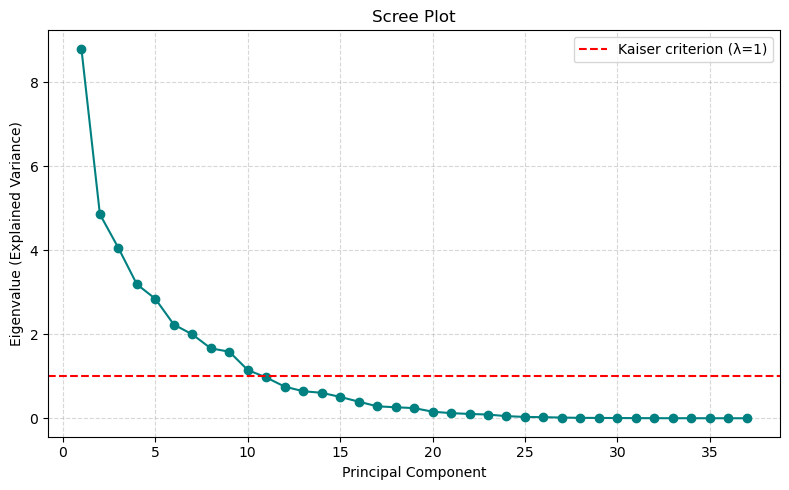

In [21]:


# Fit PCA to full number of components
pca_full = PCA().fit(X_scaled)

# Plot the scree plot
plt.figure(figsize=(8, 5))
plt.plot(
    np.arange(1, len(pca_full.explained_variance_)+1),
    pca_full.explained_variance_,
    marker='o', linestyle='-', color='teal'
)

plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue (Explained Variance)')
plt.title('Scree Plot')
plt.axhline(y=1, color='red', linestyle='--', label='Kaiser criterion (λ=1)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [22]:
# Components with eigenvalue > 1
n_kaiser = sum(pca_full.explained_variance_ > 1)
print(f"Components with eigenvalue > 1 (Kaiser criterion): {n_kaiser}")


Components with eigenvalue > 1 (Kaiser criterion): 10


In [23]:
X_scaled

array([[ 0.04169086,  0.67137993, -0.13173625, ..., -1.50224638,
        -1.75855075,  0.54251493],
       [ 0.60313194, -1.31694741,  0.98038207, ...,  0.14624726,
         0.08442854,  0.83575758],
       [-0.02037755, -1.31694741,  0.25419019, ...,  1.27589939,
         0.28785158, -1.50651004],
       ...,
       [-0.12573395, -1.27915309, -0.3503306 , ...,  1.86293175,
        -0.53099149, -1.87104379],
       [-0.56699402, -0.25658262, -0.6359953 , ..., -1.38039236,
        -0.41407901,  0.20194646],
       [-0.44756716,  0.49451441, -0.43217018, ..., -0.35759281,
         0.15007609, -0.48479784]])

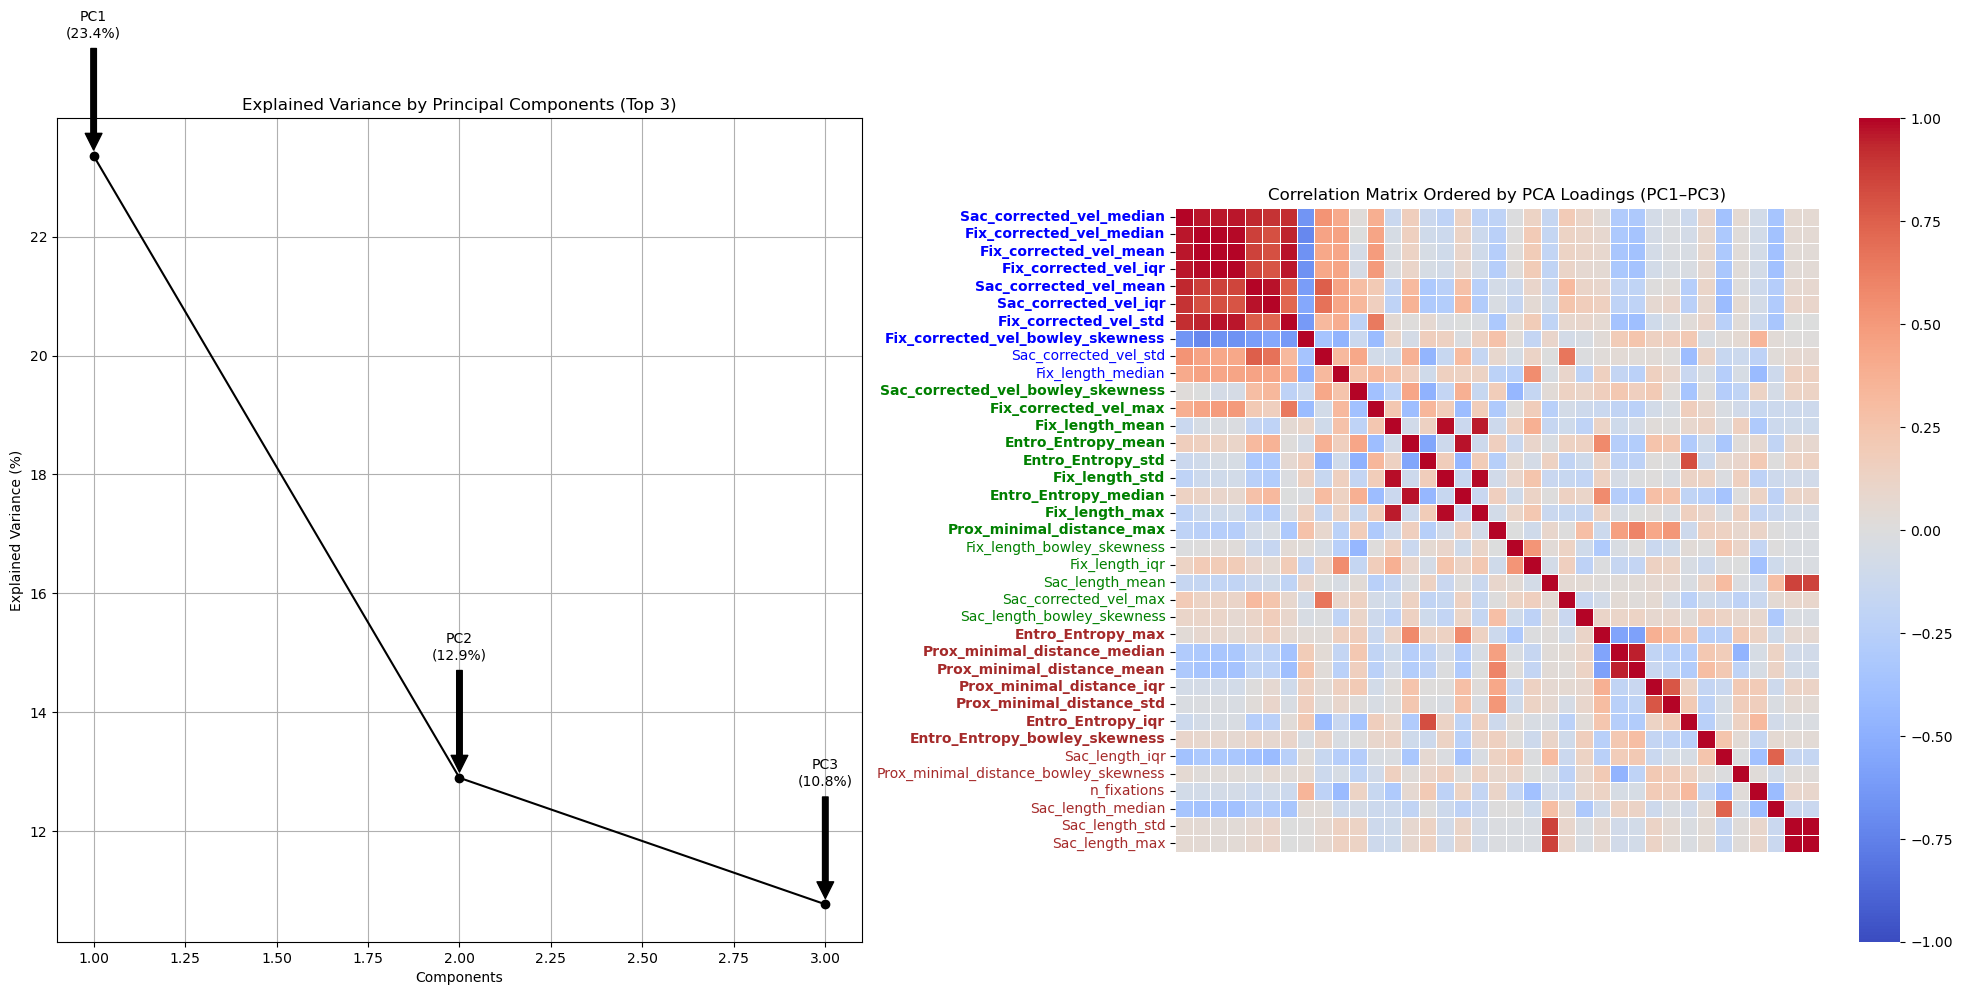

In [26]:
stats_df = numeric_df.copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(stats_df)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Reconstruct loadings using the earlier PCA
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(3)], index=numeric_df.columns)

# Use numeric_df as the data to compute correlations
stats_df = numeric_df.copy()

# Compute explained variance
explained_variance = pca.explained_variance_ratio_ * 100
components = np.arange(1, 4)  # Only 3 components computed

# Assign each feature to the PC with the highest absolute loading
feature_to_pc = loadings[['PC1', 'PC2', 'PC3']].abs().idxmax(axis=1)

# Assign color based on dominant PC
def get_feature_color(feature):
    max_pc = feature_to_pc[feature]
    return {'PC1': 'blue', 'PC2': 'green', 'PC3': 'brown'}.get(max_pc, 'black')

# Assign font weight based on absolute loading > 0.2
def get_fontweight(feature):
    max_loading = loadings.loc[feature, ['PC1', 'PC2', 'PC3']].abs().max()
    return 'bold' if max_loading > 0.2 else 'normal'

# Order features by loadings from PC1 to PC3
ordered_features_by_pc = {
    'PC1': loadings.loc[feature_to_pc == 'PC1', 'PC1'].abs().sort_values(ascending=False).index.tolist(),
    'PC2': loadings.loc[feature_to_pc == 'PC2', 'PC2'].abs().sort_values(ascending=False).index.tolist(),
    'PC3': loadings.loc[feature_to_pc == 'PC3', 'PC3'].abs().sort_values(ascending=False).index.tolist()
}

# Combine all features in order
ordered_features = ordered_features_by_pc['PC1'] + ordered_features_by_pc['PC2'] + ordered_features_by_pc['PC3']
ordered_features += [f for f in loadings.index if f not in ordered_features]  # add any remaining

# Correlation matrix
corr_matrix = stats_df.corr()
ordered_corr_matrix = corr_matrix.loc[ordered_features, ordered_features]

# Colors and font weights
feature_colors = [get_feature_color(f) for f in ordered_corr_matrix.columns]
font_weights = [get_fontweight(f) for f in ordered_corr_matrix.columns]

# Plot
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

# Scree plot
axs[0].plot(components, explained_variance[:3], 'o-', color='black')
axs[0].set_xlabel('Components')
axs[0].set_ylabel('Explained Variance (%)')
axs[0].set_title('Explained Variance by Principal Components (Top 3)')
axs[0].grid(True)

# Annotate top 3 PCs
for i, component in enumerate(['PC1', 'PC2', 'PC3']):
    x = i + 1
    y = explained_variance[i]
    axs[0].annotate(f'{component}\n({y:.1f}%)', xy=(x, y), xytext=(x, y + 2),
                    arrowprops=dict(facecolor='black', shrink=0.05), ha='center')

# Correlation heatmap
sns.heatmap(
    ordered_corr_matrix,
    cmap='coolwarm',
    vmin=-1, vmax=1,
    ax=axs[1],
    xticklabels=False,
    yticklabels=True,
    cbar=True,
    square=True,
    linewidths=0.5
)

# Apply color and fontweight to y-axis tick labels
ax = axs[1]
for ticklabel, color, weight in zip(ax.get_yticklabels(), feature_colors, font_weights):
    ticklabel.set_color(color)
    ticklabel.set_fontweight(weight)
    ticklabel.set_rotation(0)

axs[1].set_title('Correlation Matrix Ordered by PCA Loadings (PC1–PC3)')

plt.tight_layout()
plt.show()

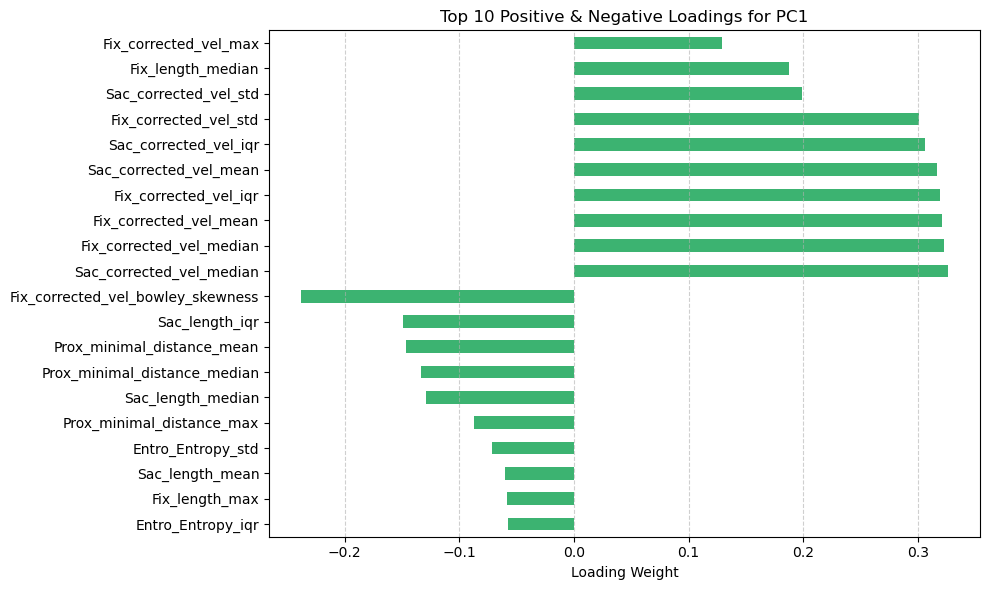

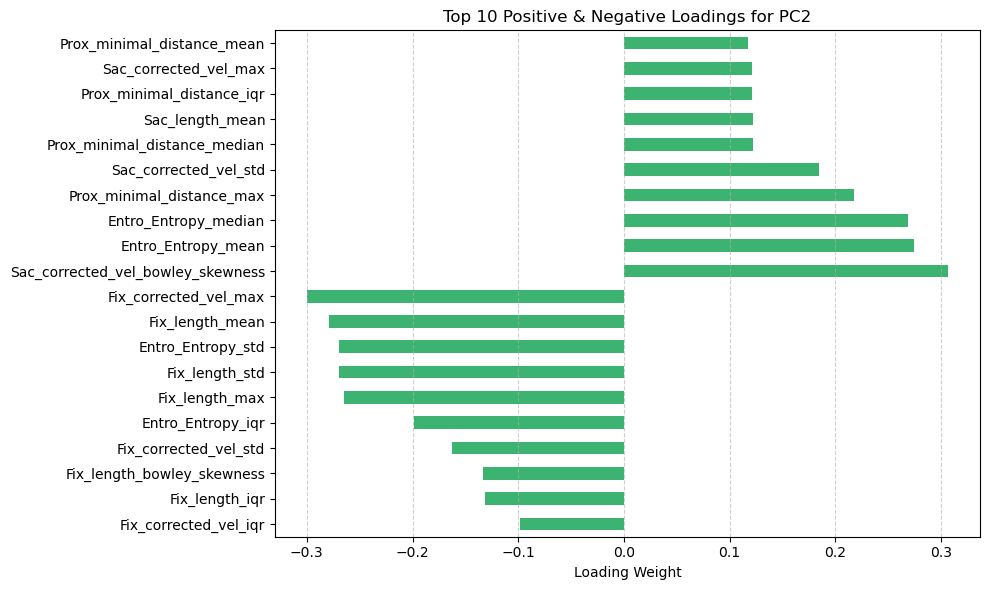

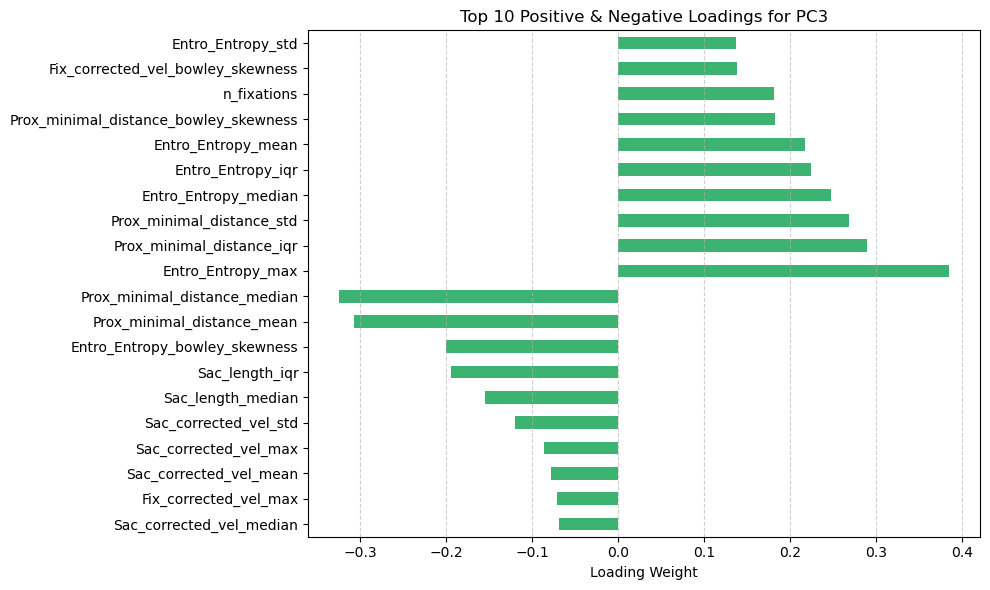

In [27]:
def plot_loadings(loadings, pc='PC1', top_n=10):
    sorted_loadings = loadings[pc].sort_values(ascending=False)
    
    top_features = sorted_loadings[:top_n]
    bottom_features = sorted_loadings[-top_n:]
    
    combined = pd.concat([bottom_features, top_features])
    
    plt.figure(figsize=(10, 6))
    combined.plot(kind='barh', color='mediumseagreen')
    plt.title(f'Top {top_n} Positive & Negative Loadings for {pc}')
    plt.xlabel('Loading Weight')
    plt.grid(True, axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Example usage:
plot_loadings(loadings, pc='PC1', top_n=10)
plot_loadings(loadings, pc='PC2', top_n=10)
plot_loadings(loadings, pc='PC3', top_n=10)


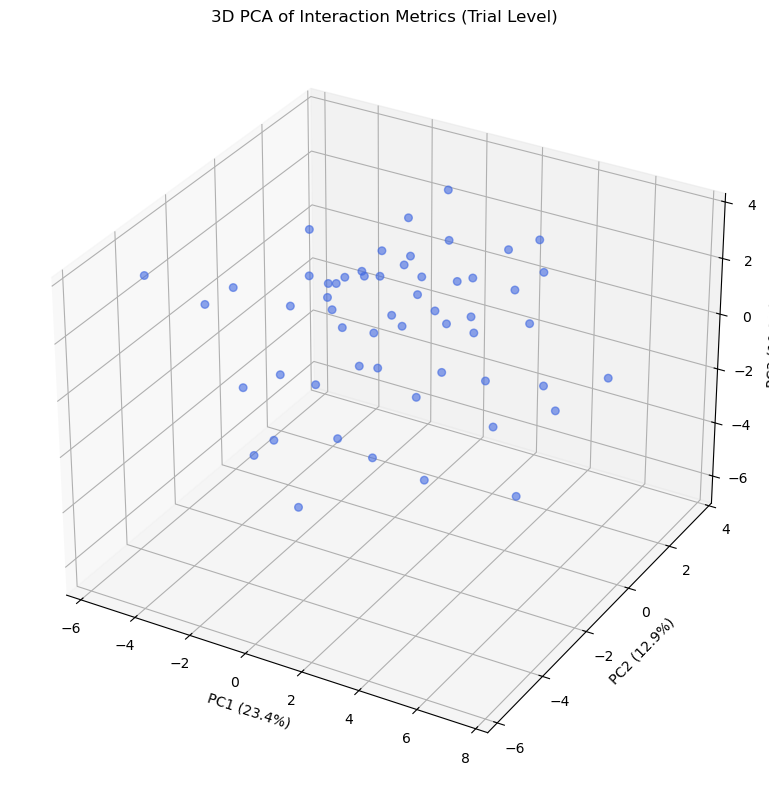

In [28]:
# --- 7. Plot the 3D PCA ---
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c='royalblue', alpha=0.6, s=30)

ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
ax.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2]*100:.1f}%)')
ax.set_title('3D PCA of Interaction Metrics (Trial Level)')

plt.tight_layout()
plt.show()



In [ ]:
# Convert ms to datetime starting from arbitrary origin (e.g., Unix epoch)
data_frame['timestamp'] = pd.to_datetime(data_frame['timeStampDataPointEnd'], unit='s')
# Now group by 10-second time bins
grouped = data_frame.groupby(pd.Grouper(key='timestamp', freq='10s'))
